# &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;GITS ASSISTANT ( THE CHATBOT )

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk

from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPool1D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

### Loading our data 

In [2]:
with open('content.json') as content:
    data = json.load(content)

### Getting all the data to lists

In [3]:
tags = []
inputs = []
responses = {}

for intent in data['intents']:
    responses[intent['tag']] = intent['responses']
    for lines in intent['input']:
        inputs.append(lines)
        tags.append(intent['tag'])


### Converting to the data frame

In [4]:
data = pd.DataFrame({"inputs": inputs, "tags": tags})

### Removing punctuation

<B>the marks, such as full stop, comma, and brackets, used in writing to separate sentences and their elements and to clarify meaning:</B>

In [5]:
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
0,hi,greeting
1,hy,greeting
2,hii,greeting
3,is anyone there,greeting
4,hello,greeting
...,...,...
132,do you know any jokes,Jokes
133,how about a joke,Jokes
134,give me a joke,Jokes
135,make me laugh,Jokes


In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])

# applying padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

# encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [7]:
input_shape = x_train.shape[1]
print(input_shape)

7


In [8]:
# define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique word: ", vocabulary)

output_length = le.classes_.shape[0]
print("output length: ", output_length)

number of unique word:  139
output length:  16


### Creating the model

In [9]:
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1, 10)(i)
x = LSTM(10, return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length, activation="softmax")(x)

model = Model(i, x)

In [10]:
# compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

### Train the model

In [11]:
train = model.fit(x_train, y_train, epochs=200)

Epoch 1/200
5/5 [==============================] - 2s 10ms/step - loss: 2.7732 - accuracy: 0.0657
Epoch 2/200
5/5 [==============================] - 0s 6ms/step - loss: 2.7698 - accuracy: 0.0730
Epoch 3/200
5/5 [==============================] - 0s 6ms/step - loss: 2.7675 - accuracy: 0.1022
Epoch 4/200
5/5 [==============================] - 0s 6ms/step - loss: 2.7645 - accuracy: 0.1606
Epoch 5/200
5/5 [==============================] - 0s 6ms/step - loss: 2.7618 - accuracy: 0.1679
Epoch 6/200
5/5 [==============================] - 0s 6ms/step - loss: 2.7585 - accuracy: 0.1606
Epoch 7/200
5/5 [==============================] - 0s 6ms/step - loss: 2.7549 - accuracy: 0.1314
Epoch 8/200
5/5 [==============================] - 0s 6ms/step - loss: 2.7513 - accuracy: 0.1241
Epoch 9/200
5/5 [==============================] - 0s 6ms/step - loss: 2.7468 - accuracy: 0.1241
Epoch 10/200
5/5 [==============================] - 0s 6ms/step - loss: 2.7415 - accuracy: 0.1022
Epoch 11/200
5/5 [==========

5/5 [==============================] - 0s 5ms/step - loss: 0.5198 - accuracy: 0.9124
Epoch 168/200
5/5 [==============================] - 0s 6ms/step - loss: 0.5094 - accuracy: 0.9124
Epoch 169/200
5/5 [==============================] - 0s 6ms/step - loss: 0.4995 - accuracy: 0.9197
Epoch 170/200
5/5 [==============================] - 0s 6ms/step - loss: 0.4970 - accuracy: 0.9270
Epoch 171/200
5/5 [==============================] - 0s 6ms/step - loss: 0.4926 - accuracy: 0.9197
Epoch 172/200
5/5 [==============================] - 0s 6ms/step - loss: 0.4894 - accuracy: 0.9124
Epoch 173/200
5/5 [==============================] - 0s 6ms/step - loss: 0.4832 - accuracy: 0.9343
Epoch 174/200
5/5 [==============================] - 0s 5ms/step - loss: 0.4769 - accuracy: 0.9343
Epoch 175/200
5/5 [==============================] - 0s 6ms/step - loss: 0.4725 - accuracy: 0.9270
Epoch 176/200
5/5 [==============================] - 0s 6ms/step - loss: 0.4663 - accuracy: 0.9343
Epoch 177/200
5/5 [=====

## Ploting model accuracy

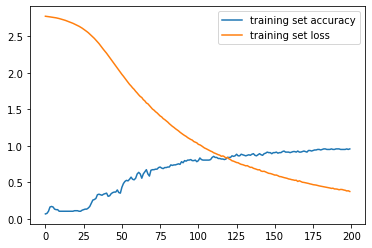

In [12]:
plt.plot(train.history['accuracy'], label='training set accuracy')
plt.plot(train.history['loss'], label='training set loss')
plt.legend()

### Chatting

In [ ]:
import random

while True:
    texts_p = []
    prediction_input = input('You : ')
    
    # removing punctuation and converting to lowercase
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)
    
    # tokenizing and padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input], input_shape)
    
#     getting output from model
    output = model.predict(prediction_input)
    output = output.argmax()
    
    # finding the right tag and predicting
    response_tag = le.inverse_transform([output])[0]
    print("gits assistant : ", random.choice(responses[response_tag]))
    
    if response_tag == "goodbye":
        break
